In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

os.chdir(r"C:\Users\Tyler\Desktop\School\MATH336\HW\HW2")

# 3.3

In [2]:
dtmean = pd.read_csv("gl_land_nohead.txt", sep='\s+',header = None, index_col = None)
dtmean

,0,1,2
0,1880,-0.41,-99.99
1,1881,-0.39,-99.99
2,1882,-0.30,-0.40
3,1883,-0.32,-0.41
4,1884,-0.60,-0.46
...,...,...,...
131,2011,0.79,0.82
132,2012,0.78,0.84
133,2013,0.82,0.85
134,2014,0.88,-99.99


In [3]:
dtmean.shape

(136, 3)

In [4]:
yrtime = dtmean.iloc[0:136,0]
tmean = dtmean.iloc[0:136,1]

def Summary(x):
    """
    This function accepts a 1-D numpy array as an argument, and uses a
    DataFrame to return a string that displays a summary of the data:
    the quantiles and the mean.
    """
    deets = np.quantile(x, [0, .25, .5, .75, 1])
    deets = np.array([np.append(deets, np.mean(x))])
    df = pd.DataFrame(data=deets,
                      columns=['Min.', '1st Qu.', 'Median',
                               '3rd Qu.', 'Max.', 'Mean'],
                      index=['values'])
    print(df.to_string())

In [5]:
Summary(tmean)

        Min.  1st Qu.  Median  3rd Qu.  Max.      Mean
values -0.64  -0.2825   -0.08     0.22  0.99  0.012426


In [6]:
Summary(yrtime)

          Min.  1st Qu.  Median  3rd Qu.    Max.    Mean
values  1880.0  1913.75  1947.5  1981.25  2015.0  1947.5


Text(0.5, 1.0, 'Land Temp. Anomalies')

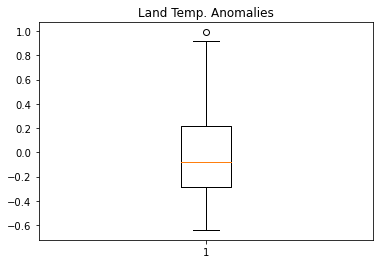

In [7]:
plt.boxplot(tmean)
plt.title("Land Temp. Anomalies")

Text(0, 0.5, 'Frequency')

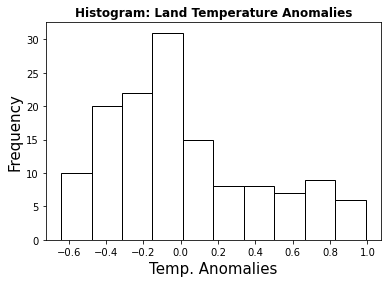

In [8]:
plt.hist(tmean, bins=10, facecolor='w', edgecolor='k', rwidth=1, align = 'mid')
plt.title("Histogram: Land Temperature Anomalies",fontweight="bold")
plt.xlabel("Temp. Anomalies",size=15)
plt.ylabel("Frequency",size=15)

In [9]:
tmean

0     -0.41
1     -0.39
2     -0.30
3     -0.32
4     -0.60
       ... 
131    0.79
132    0.78
133    0.82
134    0.88
135    0.99
Name: 1, Length: 136, dtype: float64

In [10]:
yrtime

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
131    2011
132    2012
133    2013
134    2014
135    2015
Name: 0, Length: 136, dtype: int64

In [11]:
def linear_model(x):
    """
    This function accepts a numpy array of length 2, and returns a linear
    lambda function using the elements of the array as the coefficients,
    like so: f(t) = x[0]*t + x[1]
    """
    return lambda t: x[0]*t + x[1]

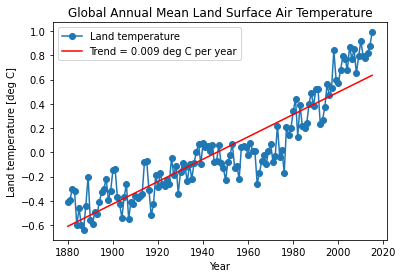

In [12]:
tempTrend = np.polyfit(yrtime,tmean.astype(float),1)
tempLine = linear_model(tempTrend)

plt.plot(yrtime, tmean, 'o-', label='Land temperature')
plt.plot(yrtime,tempLine(yrtime), 'r',
         label=f"Trend = {tempTrend[0]:.3f} deg C per year")

plt.xlabel('Year')
plt.ylabel('Land temperature [deg C]')
plt.title('Global Annual Mean Land Surface Air Temperature')
plt.legend()
plt.show()

In [13]:
print(tempTrend)

[ 9.22296169e-03 -1.79492914e+01]


In [14]:
import statsmodels.api as sm

# Assuming tmean and yrtime are both numpy arrays or pandas series
reg8014 = sm.OLS(tmean, sm.add_constant(yrtime)).fit()

# Print the model summary
print(reg8014.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     613.4
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           7.37e-52
Time:                        13:09:26   Log-Likelihood:                 48.625
No. Observations:                 136   AIC:                            -93.25
Df Residuals:                     134   BIC:                            -87.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.9493      0.725    -24.745      0.0

In [15]:
#Get residuals of 
residuals = reg8014.resid
print(residuals)
print(f"\nMinimum residual: {np.min(residuals)} \nMaximum residual: {np.max(residuals)}")

0      0.200123
1      0.210900
2      0.291678
3      0.262455
4     -0.026768
         ...   
131    0.191915
132    0.172693
133    0.203470
134    0.254247
135    0.355024
Length: 136, dtype: float64

Minimum residual: -0.4452808787748659 
Maximum residual: 0.361813964028435


Residual standard error formula:

\begin{align*}
\hat{\sigma} = SD_{\epsilon} \sqrt{\frac{n-1}{n-K}}
\end{align*}

In [16]:
se_residuals = np.std(residuals, ddof=1) * np.sqrt((135 - 1) / (135 - 2))
print(f"The residual standard error is : {se_residuals}.")

The residual standard error is : 0.17049655495021854.


Calculate R-squared:

In [17]:
from scipy.stats import pearsonr

# assuming tmean and yrtime are numpy arrays or lists
corr, _ = pearsonr(tmean, yrtime)
corr_squared = np.square(corr)
corr_squared

0.8207124808669548

# 3.4 Hansen's data analysis.

In [18]:
dtmean = pd.read_csv("gl_land_oceanHan-r1.txt", sep='\s+',header = 0, index_col = 0)
dtmean

,Anomaly,mean
Year,,
1880,-0.20,-99.99
1881,-0.11,-99.99
1882,-0.09,-0.17
1883,-0.20,-0.20
1884,-0.27,-0.23
...,...,...
2010,0.71,0.62
2011,0.59,0.64
2012,0.62,0.66


In [19]:
#a) Statistical Summary
dtmeanAnom = dtmean.loc[:,'Anomaly']
dtmeanAnom

Summary(dtmeanAnom)

        Min.  1st Qu.  Median  3rd Qu.  Max.      Mean
values -0.47    -0.21   -0.08    0.175  0.74  0.011852


Text(0.5, 1.0, 'Boxplot of Hansen’s global temp data 1880-2014\u200b')

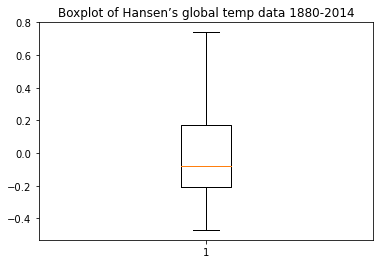

In [20]:
#b) Box plot
plt.boxplot(dtmeanAnom)
plt.title("Boxplot of Hansen’s global temp data 1880-2014​")

Text(0, 0.5, 'Frequency')

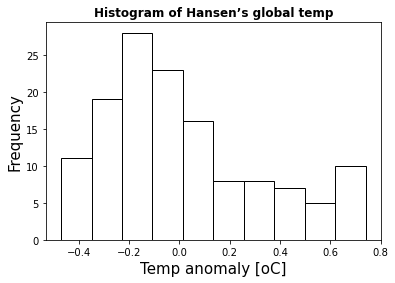

In [21]:
#c) Histogram
plt.hist(dtmeanAnom, bins=10, facecolor='w', edgecolor='k', rwidth=1, align = 'mid')
plt.title("Histogram of Hansen’s global temp",fontweight="bold")
plt.xlabel("Temp anomaly [oC]",size=15)
plt.ylabel("Frequency",size=15)

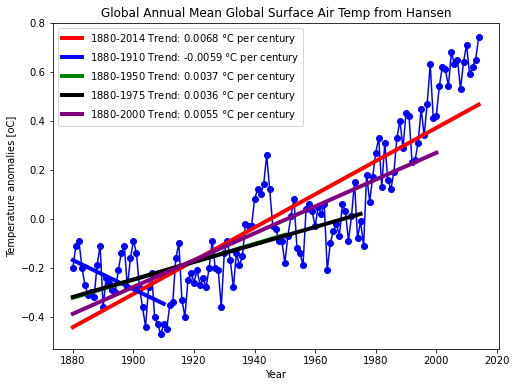

In [22]:
#d) Linear regression models


# Define x and y variables
y18802014 = dtmean["Anomaly"].values
x18802014 = np.arange(1880, 2015)

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(x18802014, y18802014, "o-", color="blue")
plt.xlabel("Year")
plt.ylabel("Temperature anomalies [oC]")
plt.title("Global Annual Mean Global Surface Air Temp from Hansen")

# Fit linear regression models and add trend lines to the plot
for start, end, color in [(1880, 2014, "red"),(1880, 1910, "blue"), (1880, 1950, "green"), (1880, 1975, "black"), (1880, 2000, "purple")]:
    x = np.arange(start, end + 1)
    y = dtmean["Anomaly"].values[:len(x)]
    anomTrend = np.polyfit(x, y, 1)
    anomLine = linear_model(anomTrend)
    lab = f"1880-{end} Trend: {anomTrend[0]:.4f} $\degree$C per century"
    plt.plot(x,anomLine(x) , "-", color=color, linewidth=4, label = lab)

plt.legend(loc='upper left')
plt.show()

# 4.7 

Use the EBM and Python to estimate the lunar surface temperature at lunar latitude 30 degrees North at 3:00pm, lunar local time. Hint: The 12:00pm noon for a lunar location is when the location directly faces the Sun. From this point, the location of 3:00pm can be found.

In [23]:
from math import pi
import numpy as np
from scipy.optimize import root_scalar

# Equator noon: beta = 0
beta = 45 # 0 for noon, 15 for 1pm, 30 for 2pm, 45 for 3pm
betar = beta * pi / 180
lat = 30 * pi / 180  # 60N # 0 latitude or enter non-zero latitude
sigma = 5.670367 * 10**(-8) # Blackbody radiation law
alpha = 0.12 # reflection
S = 1368 # solar constant, i.e., sun radiation w/mˆ2
ep = 0.98 # related to radiation
k = 7.4 * 10**(-4) # related heat conduction from surface down
h = 0.4 # related to conduction
T0 = 260 # temp underneath surface

def fEBM(T):
    return (1 - alpha) * S * (np.cos(betar) * np.cos(lat)) - (ep * sigma * T**4 + k * (T - T0) / h)

# Numerically solve this EBM: fEBM = 0
sol = root_scalar(fEBM, bracket=[100, 460], method='brentq')
print(f"Temperature at latitude 30 degrees north at 3:00pm: {sol.root:.2f} K")


Temperature at latitude 30 degrees north at 3:00pm: 339.36 K


# 4.8

Use the EBM and Python to estimate the lunar surface temperature at 24 points uniformly distributed on the equator. List the results in a table of 3 columns. The first column is longitude, the second is temperature in Kelvin, and the third is temperature in degrees Celcius.

In [24]:
eqLon = np.arange(-60,60,5)
kelv = np.array([])
cels = np.array([])

# Equator noon: beta = 0
#beta = 45 # 0 for noon, 15 for 1pm, 30 for 2pm, 45 for 3pm
#betar = beta * pi / 180
lat = 0 * pi / 180  # 60N # 0 latitude or enter non-zero latitude
sigma = 5.670367 * 10**(-8) # Blackbody radiation law
alpha = 0.12 # reflection
S = 1368 # solar constant, i.e., sun radiation w/mˆ2
ep = 0.98 # related to radiation
k = 7.4 * 10**(-4) # related heat conduction from surface down
h = 0.4 # related to conduction
T0 = 260 # temp underneath surface

for i in eqLon:
    beta = i
    betar = beta * pi / 180
    
    # Numerically solve this EBM: fEBM = 0
    sol = root_scalar(fEBM, bracket=[100, 460], method='brentq')

    kelv = np.append(kelv,sol.root)
    cels = np.append(cels, sol.root - 273)

dataArr = np.stack((eqLon,kelv,cels),axis = 1)


import pandas as pd
cols = ['Long.','Kelvin','Celcius']
moonTemps = pd.DataFrame(dataArr, columns = cols )
moonTemps

,Long.,Kelvin,Celcius
0,-60.0,322.592669,49.592669
1,-55.0,333.856027,60.856027
2,-50.0,343.501058,70.501058
3,-45.0,351.789175,78.789175
4,-40.0,358.901133,85.901133
5,-35.0,364.966186,91.966186
6,-30.0,370.078904,97.078904
7,-25.0,374.309425,101.309425
8,-20.0,377.709956,104.709956
9,-15.0,380.319016,107.319016


# 5.1 

# a) Find all the currents.

We will designate the following loops:

Box 1 = Loop 1

Box 1,2 = Loop 2

Box 1,2,3 = Loop 3

The first node indicates:
\begin{align*}
I_{3} + I_{2} = I_{1}
\end{align*}

The second node indicates: 
\begin{align*}
I_{4} + I_{5} = I_{3}
\end{align*}


Loop 1:
\begin{align*}
9I_{1} + 6I_{2} = 12
\end{align*}

Loop 2:
\begin{align*}
9I_{1} + 3I_{3} + 4I_{4} = 12
\end{align*}

Loop 3:
\begin{align*}
9I_{1} + 3I_{3} + 9I_{5} + 3I_{5} = 12
\end{align*}


Then our system of equations becomes:

\begin{align*}
I_{1} - I_{2} - I_{3} = 0 \\
I_{3} - I_{4} - I_{5} = 0 \\
9I_{1} + 6I_{2} = 12 \\
9I_{1} + 3I_{3} + 4I_{4} = 12 \\
9I_{1} + 3I_{3} + 12I_{5} = 12 \\
\end{align*}

In [25]:
A = np.array([[1,-1,-1,0,0],[0,0,1,-1,-1],[9,6,0,0,0],[9,0,3,4,0],[9,0,3,0,12]])
b = np.array([0,0,12,12,12])

sol = np.linalg.solve(A,b)

from IPython.display import display, Latex

print(f"Then the values are: \n")
for i in range(5) :
    display(Latex(f'$I_{i+1}$ = {sol[i]} mA\n'))

Then the values are: 



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# b) Find the voltage difference between two sides of a resistor using Ohm's law V = IR. 


Loop 1:

$V_{1} = 6 k\Omega \times I_{2} = 9 k\Omega \times 1 mA = 9V$

$V_{a} = 6 k\Omega \times I_{2} = 6 k\Omega \times 0.5 mA = 3V$

Loop 2:

$V_{3} = 3 k\Omega \times I_{3} = 3 k\Omega \times 0.5 mA = 1.5V$

$V_{b} = 4 k\Omega \times I_{4} = 4 k\Omega \times 0.375 mA = 1.5V$

Loop 3:

$V_{5} = 9 k\Omega \times I_{5} = 9 k\Omega \times 0.125 mA = 1.125V$

$V_{c} = 3 k\Omega \times I_{5} = 3 k\Omega \times 0.125 mA = 0.375V$

# c) Find the power consumed by each resister using $P = I^{2}R$ or $P = IV$.

$9 k\Omega \Rightarrow P = (1.0mA)^{2} \times 9k\Omega = 9mW$

$6 k\Omega \Rightarrow P = (0.5mA)^{2} \times 6k\Omega = 1.5mW$

$3 m\Omega \Rightarrow P = (0.5mA)^{2} \times 3k\Omega = 0.75mW$

$4 m\Omega \Rightarrow P = (0.375mA)^{2} \times 4k\Omega = 0.5625mW$

$9 m\Omega \Rightarrow P = (0.125mA)^{2} \times 9k\Omega = 0.140625mW$

$3 m\Omega \Rightarrow P = (0.125mA)^{2} \times 3k\Omega = 0.046875mW$

# d) What is the total power load of this circuit? How much work is done by the battery in this circuit in 10 minutes?

$P_{Total} =$ The power consumed by the resistors. Therefore,

$P_{Total} = 9mW + 1.5mW + 0.75mW + 0.5625mW + 0.1406mW + 0.046875mW = 12mW = 0.012W$

10min = 600 seconds

W = PT =  0.012W $\times$ 600s  = 7.2 joules

# 5.2 The burning of gasoline ($C_{8}H_{18}$) with oxygen($O_{2}$) produces water($H_{2}O$) and carbon dioxide($CO_{2}$). Balance the chemical reaction equation.

$C_{8}H_{18} + O_{2} = H_{2}O + CO_{2}$



$C_{8}H_{18} + O_{2} = H_{2}O + 8CO_{2}$

$C_{8}H_{18} + O_{2} = 9H_{2}O + 8CO_{2}$

Now that Carbon and Hydrogen are balanced, need to balance Oxygen. There are 25 on the right side and 2 on the left. Then if we multiply the left side Oxygen by $\frac{25}{2}$, and then multiply the entire equation by 2 we have,

$C_{8}H_{18} + \frac{25}{2}O_{2} = 9H_{2}O + 8CO_{2}$

$2C_{8}H_{18} + 25O_{2} = 18H_{2}O + 16CO_{2}$

# 5.4 

# a)

Leontif production model:

$x = Ax + D$

We account for internal production/consumption of each sector with the matrix,


In [26]:
A = np.array([[0.245,0.102,0.051],[0.099,0.291,0.279],[0.433,0.372,0.011]])

The amount of production from the sectors will be noted as a 3 dimension vector,

\begin{equation*}
x = 
\begin{pmatrix}
a_{1}  \\
m_{2}  \\
h_{3} 
\end{pmatrix}
\end{equation*}

Demand will be noted as:

In [27]:
D = np.array([2.88,31.45,30.91])

Now we convert our Leontif production model to,

$(I-A)x = D$

I being the identity matrix. Then we can solve for our necessary production values in vector x with row operations.

In [28]:
I = np.identity(3)
sol = np.linalg.solve(I - A,D)
sol

array([18.20792271, 73.16603495, 66.74600155])

Then the optimal production levels for our sectors represented by the vector x in billions of USD becomes,

\begin{equation*}
x = 
\begin{pmatrix}
a_{1}  \\
m_{2}  \\
h_{3} 
\end{pmatrix}
=
\begin{pmatrix}
18.20792271  \\
73.16603495  \\
66.74600155 
\end{pmatrix}
\end{equation*}

# b)

The production values seem to reflect our external demand fairly well. Agriculture had the lowest outside demand and shows the lowest necessary production level at 18 billion. While agriculture and household had relatively close export needs and have similar required production needs at 73 and 66 billion.

# 5.8

In [29]:
import pandas as pd
import os

os.chdir(r"C:\Users\Tyler\Desktop\School\MATH336\HW\HW2")
globTemp = pd.read_csv("NOAAGlobalT.csv", header=0, index_col=0)

#Replace missing data with NaN so -999.9 is not included in our plot
globTemp = globTemp.replace(-999.9,np.NaN)

Tropical Pacific:
Lat: 20N Lon: 160

Data located at row 1617.

In [30]:
pacDat = np.array(globTemp.iloc[1923,854:1454])
pacDat = pacDat.reshape(50,12)

#Panda Dataframe for easy look up of data
months =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = np.arange(1951,2001, 1)
pacDataF = pd.DataFrame(pacDat, index = years, columns = months )

In [31]:
u, s, v = np.linalg.svd(pacDat, full_matrices=False)

# a)

In [32]:
print(f"First 10 Singular values of pacDat(Matrix D/s):\n")
for i in range(10):
    print(f"{s[i]:.3f}")

First 10 Singular values of pacDat(Matrix D/s):

24.669
20.549
18.932
16.728
14.510
13.365
10.833
10.293
8.798
8.489


# b)

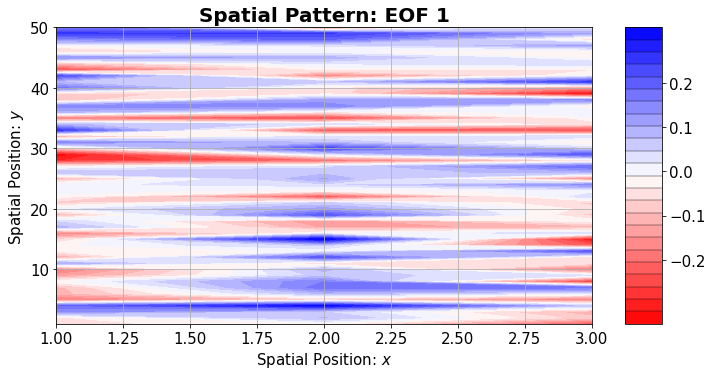

In [33]:
umat = u[:,0:3]
#.reshape(15, 10, order='F')
# .reshape lets you change the numpy array's dimensions to the
# dimensions specified. Order is the way in which elements are
# taken from the original and added to the newly shaped array.
# 'F' is for Fortran-like (column major).

clev = np.linspace(umat.min(), umat.max(), 25)
# The number of levels we want for the contourf below.

#Figure 5.3
fig = plt.figure(figsize=(12,12))

x = np.arange(3) + 1
y = np.arange(50) + 1

ax1 = plt.subplot2grid((2,1), (0,0))
# This implicitly creates a 2 by 1 array of plots in fig, and
# ax1 refers to the first. This way of declaring the plot has
# to be used instead of ways already articulated, because the
# colorbar on the contourf plot is incompatible with the old
# way. This method, however, is compatible.

contf = ax1.contourf(x, y, umat, clev, cmap=plt.cm.get_cmap('bwr').reversed())
colbar = plt.colorbar(contf, drawedges=True, aspect=8)
colbar.set_ticks([-.2,-.1,0,.1,.2])
colbar.ax.tick_params(labelsize=15)
# This sets the ticks that show up on the colorbar manually,
# much like setting the ticks on the axes manually.

ax1.set_xlabel("Spatial Position: $x$", size = 15)
ax1.set_ylabel("Spatial Position: $y$", size = 15)
ax1.set_title("Spatial Pattern: EOF 1", size=20,fontweight="bold")
ax1.tick_params(labelsize=15)
ax1.grid()

# c)

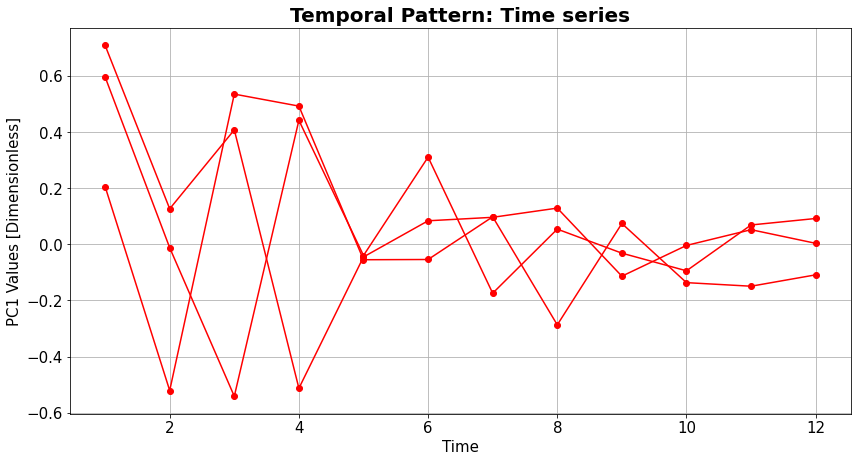

In [34]:
fig = plt.figure(figsize=(12,12))
ax2 = plt.subplot2grid((2,1), (1,0))
# This creates the second plot in our 2 by 1 array of plots.
# ax2 is the second.

ax2.plot(np.arange(v.shape[0]) + 1, v[:,0:3], 'ro-')
ax2.set_xlabel("Time", size = 15)
ax2.set_ylabel("PC1 Values [Dimensionless]", size = 15)
ax2.tick_params(labelsize=15)
ax2.set_title("Temporal Pattern: Time series", size=20,fontweight="bold")
ax2.grid()

fig.tight_layout(pad=1)

fig.savefig("CH5;Spatial&TemporalPatterns.jpg", bbox_inches='tight')